In [260]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#parameters of the problem
nx = 30   #filas
ny = 45   #columnas
iterations = 2000
length_obstacle = int(nx/3)
width_obstacle = int(nx/3)
reynolds_number = 1 
w_relax = 1

#define flux and vorticity domains
stream_array=np.zeros([nx,ny])
for ii in range(nx):
    stream_array[ii,:] = nx - 1 - ii

vorticity_array=np.zeros([nx,ny])
#position of obstacle
left_end = int(ny/3)
right_end = left_end + length_obstacle


In [261]:
def stream_relax(s_arr, v_arr, nx, ny, w, wd, end_l, end_r):
                
    #boundaries D,C, and B     
    for ii in range(2*wd,nx-1):
        for jj in range(end_l,end_r):
            s_arr[ii][jj] = 0 
    
    #boundary F 
    for ii in range(1,nx-1):
        temp = 2*s_arr[ii][1] + s_arr[ii+1][0] + s_arr[ii-1][0] - v_arr[ii][0]
        s_arr[ii,0] = w*(temp/4) + (1-w)*s_arr[ii,0]  
        
    #boundary G
    for jj in range(1,ny-1):
        temp = -1 + 2*s_arr[1][jj] + s_arr[0][jj+1] + s_arr[0][jj-1] 
        s_arr[0][jj] = w*(temp/4) + (1-w)*s_arr[0][jj] 
        
    #boundaries E, A 
    for jj in range(1,ny-1):
        s_arr[nx-1][jj] = 0
            
    #boundary H
    for ii in range(1,nx-1):
        temp = 2*s_arr[ii][ny-2] + s_arr[ii+1][ny-1] + s_arr[ii-1][ny-1] - v_arr[ii,ny-2]
        s_arr[ii][ny-1] = w*(temp/4) + (1-w)*s_arr[0,jj]
        
    #upper left corner
    s_arr[0][0] = (s_arr[1][0] + s_arr[0][1])/2
    
    #upper right corner 
    s_arr[0][ny-1] = (s_arr[0][ny-2] + s_arr[1][ny-1])/2
    
    #lower right corner 
    s_arr[nx-1][ny-1] = (s_arr[nx-2][ny-1] + s_arr[nx-1][ny-2])/2    
    
    #lower left corner 
    s_arr[nx-1][0] = (s_arr[nx-2][0] + s_arr[nx-1][1])/2    
    
    #stream
    for ii in range(1,2*wd):
        for jj in range(1,ny-1):
            temp = s_arr[ii][jj-1] + s_arr[ii][jj+1] + s_arr[ii-1][jj] + s_arr[ii+1][jj] - v_arr[ii,jj]
            s_arr[ii][jj] = w*(temp/4) + (1-w)*s_arr[ii][jj]
            
    for ii in range(2*wd,nx-1):
        for jj in range(1,end_l):
            temp = s_arr[ii][jj-1] + s_arr[ii][jj+1] + s_arr[ii-1][jj] + s_arr[ii+1][jj] - v_arr[ii,jj]
            s_arr[ii][jj] = w*(temp/4) + (1-w)*s_arr[ii][jj]     
            
    for ii in range(2*wd,nx-1):
        for jj in range(end_r,ny-1):
            temp = s_arr[ii][jj-1] + s_arr[ii][jj+1] + s_arr[ii-1][jj] + s_arr[ii+1][jj] - v_arr[ii,jj] 
            s_arr[ii][jj] = w*(temp/4) + (1-w)*s_arr[ii][jj]               

In [262]:
def vorticity_relax(s_arr, v_arr, nx, ny, w, wd, end_l, end_r, re):
    #boundaries G, E, A 
    for jj in range(ny):
        v_arr[0][jj] = 0
        v_arr[nx-1][jj] = 0
        
    #boundary F 
    for ii in range(1,nx-1):
        v_arr[ii][0] = 0    
        
    #vorticity
    for ii in range(1,2*wd):
        for jj in range(1,ny-1):
            temp1 = v_arr[ii][jj-1] + v_arr[ii][jj+1] + v_arr[ii-1][jj] + v_arr[ii+1][jj] 
            temp2 = (re/4)*(s_arr[ii+1][jj] - s_arr[ii-1][jj])*(v_arr[ii][jj+1] - v_arr[ii][jj-1])
            temp3 = (re/4)*(s_arr[ii][jj+1] - s_arr[ii][jj-1])*(v_arr[ii+1][jj] - v_arr[ii-1][jj])
            v_arr[ii][jj] = w*((temp1-temp2+temp3)/4) + (1-w)*v_arr[ii][jj]
            
    for ii in range(2*wd,nx-1):
        for jj in range(1,end_l):
            temp1 = v_arr[ii][jj-1] + v_arr[ii][jj+1] + v_arr[ii-1][jj] + v_arr[ii+1][jj]  
            temp2 = (re/4)*(s_arr[ii+1][jj] - s_arr[ii-1][jj])*(v_arr[ii][jj+1] - v_arr[ii][jj-1])
            temp3 = (re/4)*(s_arr[ii][jj+1] - s_arr[ii][jj-1])*(v_arr[ii+1][jj] - v_arr[ii-1][jj])
            v_arr[ii][jj] = w*((temp1-temp2+temp3)/4) + (1-w)*v_arr[ii][jj]
            
    for ii in range(2*wd,nx-1):
        for jj in range(end_r,ny-1):
            temp1 = v_arr[ii][jj+1] + v_arr[ii][jj-1] + v_arr[ii+1][jj] + v_arr[ii-1][jj]
            temp2 = (re/4)*(s_arr[ii+1][jj] - s_arr[ii-1][jj])*(v_arr[ii][jj+1] - v_arr[ii][jj-1])
            temp3 = (re/4)*(s_arr[ii][jj+1] - s_arr[ii][jj-1])*(v_arr[ii+1][jj] - v_arr[ii-1][jj])
            v_arr[ii][jj] = w*((temp1-temp2+temp3)/4) + (1-w)*v_arr[ii][jj]
     
    #boundary H
    for ii in range(1,nx-1):
            temp1 = 2*v_arr[ii][ny-2] + v_arr[ii-1][ny-1] + v_arr[ii+1][ny-1]
            v_arr[ii][ny-1] = w*(temp1/4) + (1-w)*v_arr[ii][ny-1]        
    
    #obstacle boundaries
    #in the obstacle    
    for ii in range(2*wd+1,nx-1):
        for jj in range(end_l+1,end_r-1):
            s_arr[ii][jj] = 0 
    
    #at boundaries D,C, and B
    for ii in range(2*wd,nx-1):
        v_arr[ii][end_l] = 2*(s_arr[ii][end_l-1]-s_arr[ii][end_l])
        v_arr[ii][end_r-1] = 2*(s_arr[ii][end_r-1+1]-s_arr[ii][end_r-1])
    
    for jj in range(end_l+1,end_r-1):
        v_arr[2*wd][jj] = 2*(s_arr[2*wd-1][jj] - s_arr[2*wd][jj])
        
    #temp3 = (re/4)*(s_arr[ii][ny] - s_arr[ii][ny-2])*(v_arr[ii+1][ny-1] - v_arr[ii-1][ny-1]) this is 0
    #because the stream satisfies dphi/dx=0 on the boundary H.

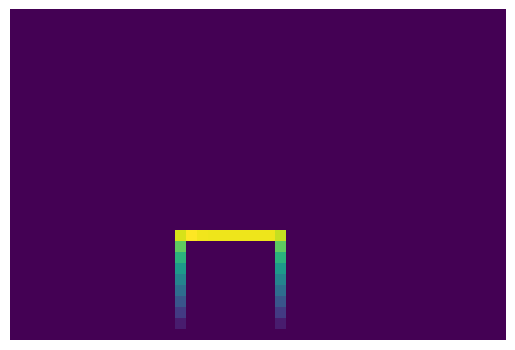

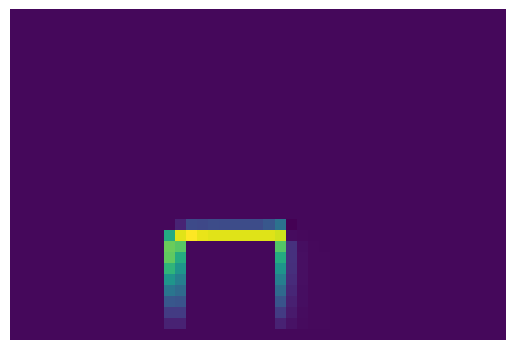

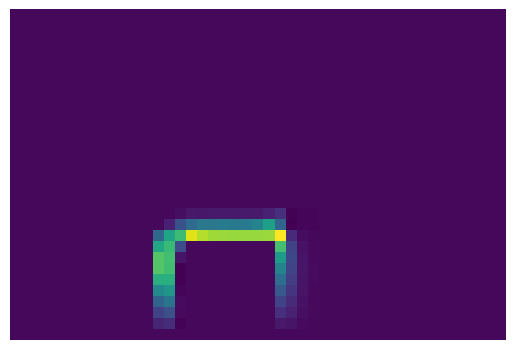

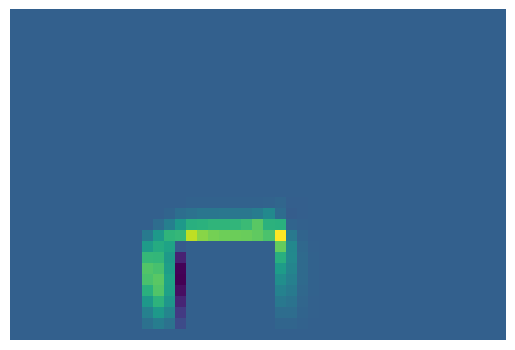

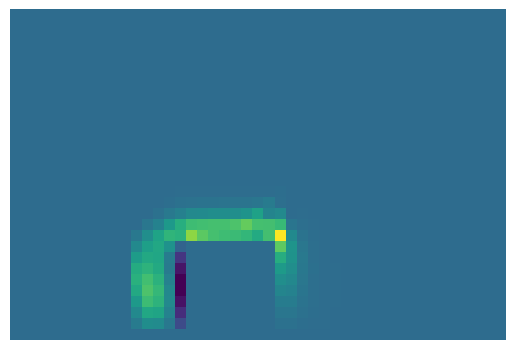

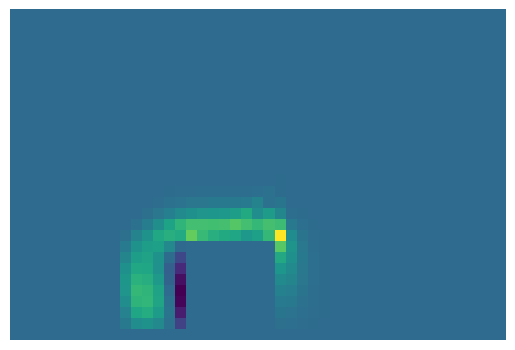

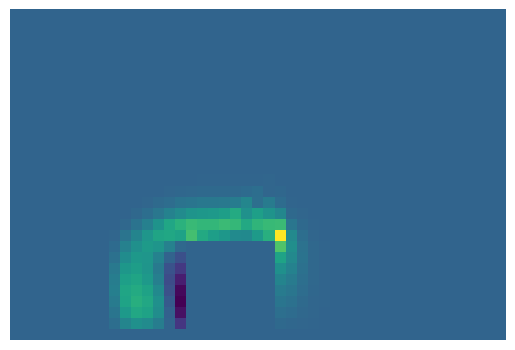

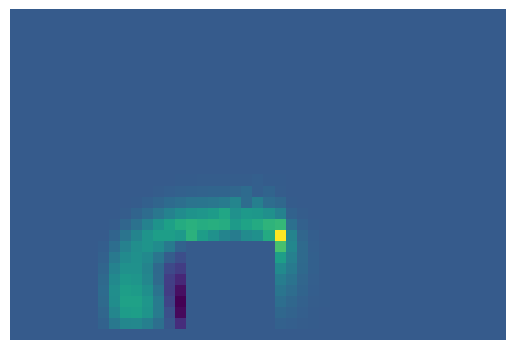

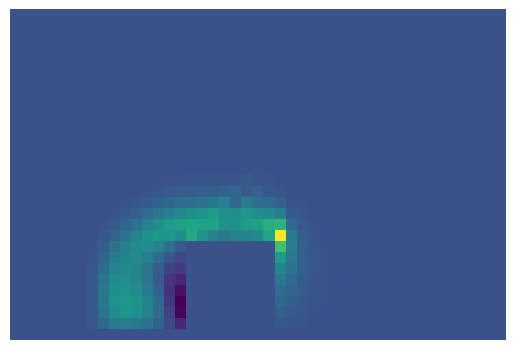

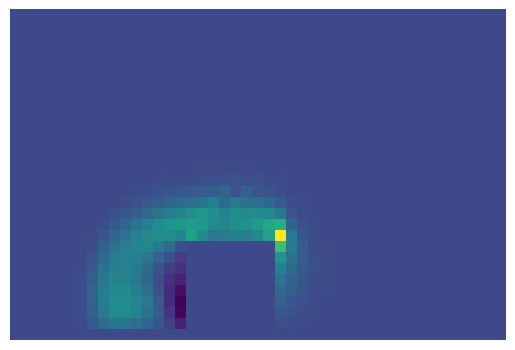

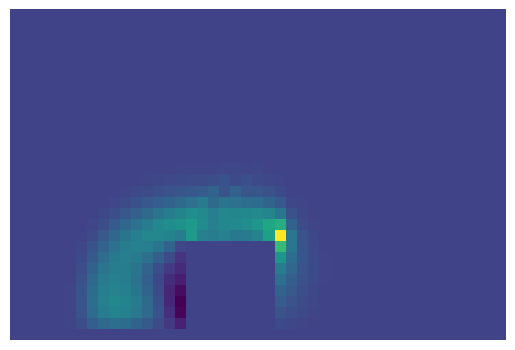

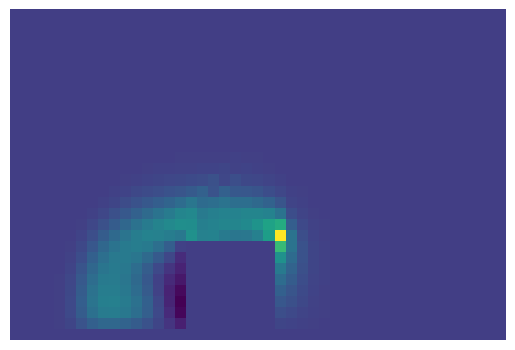

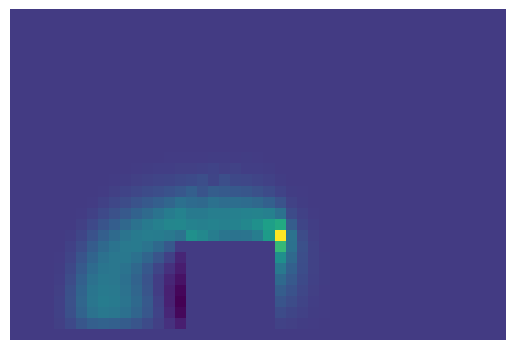

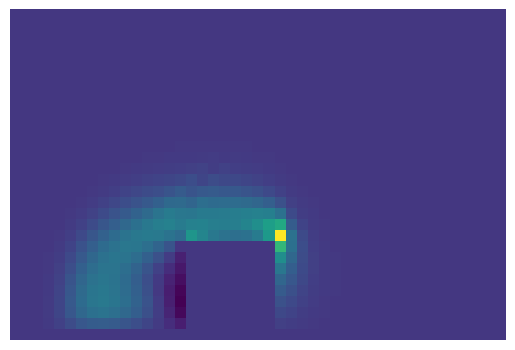

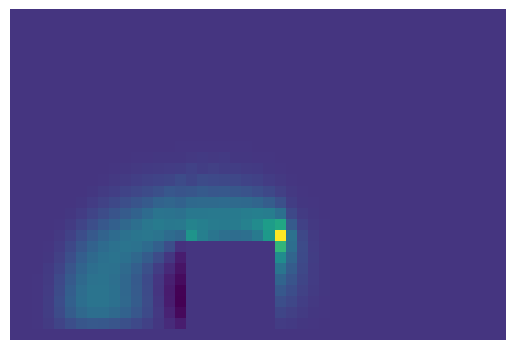

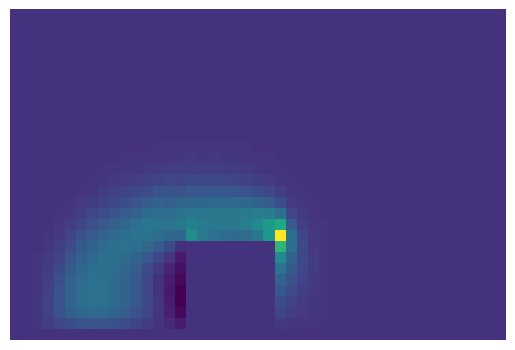

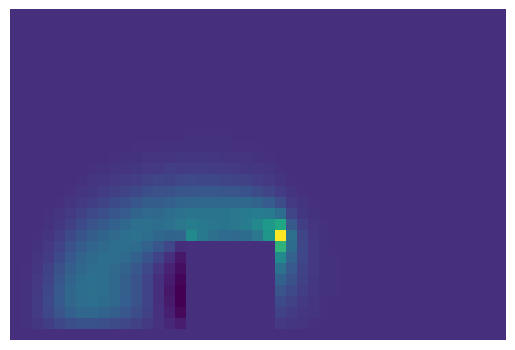

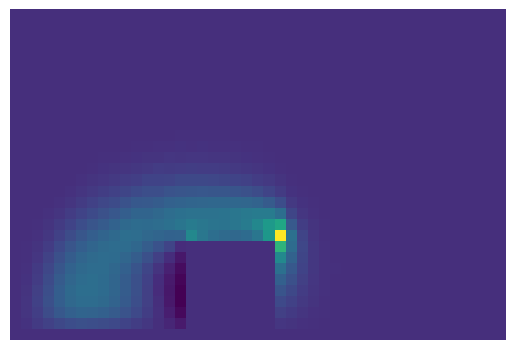

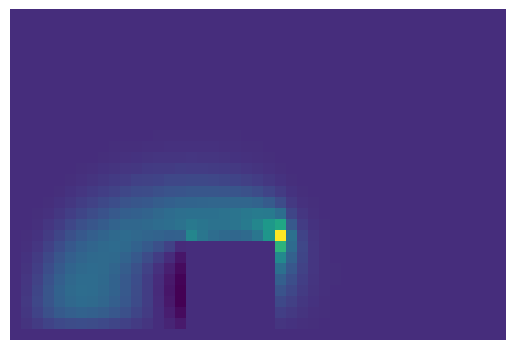

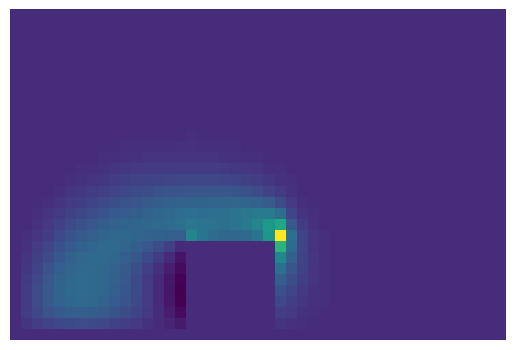

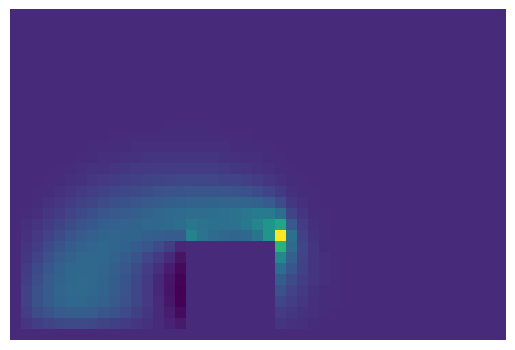

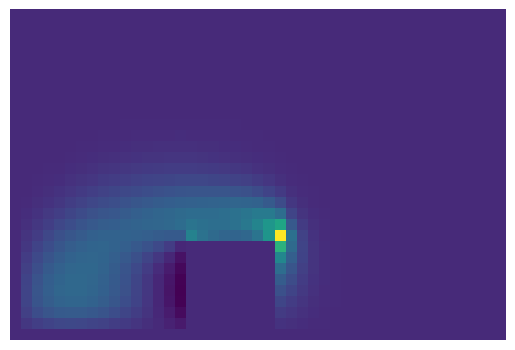

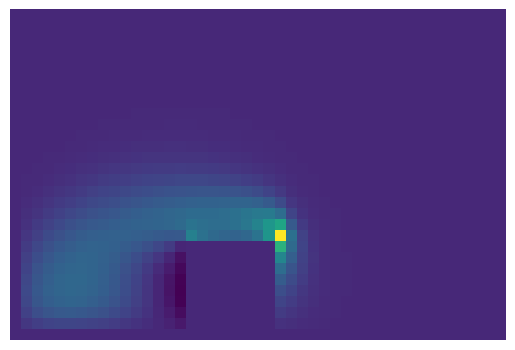

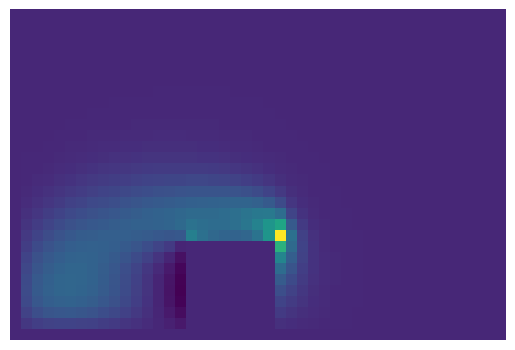

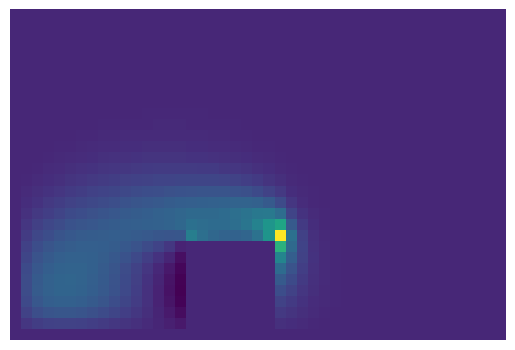

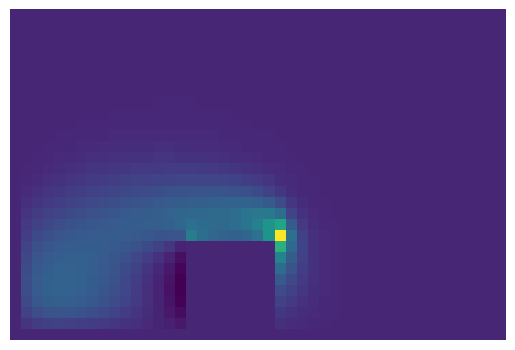

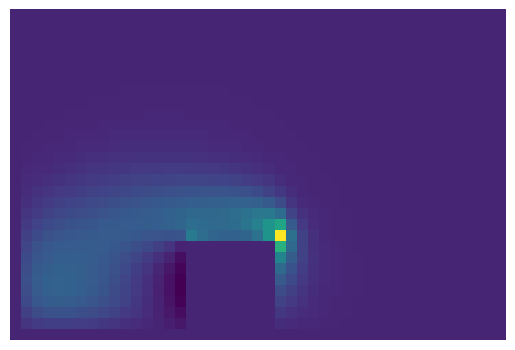

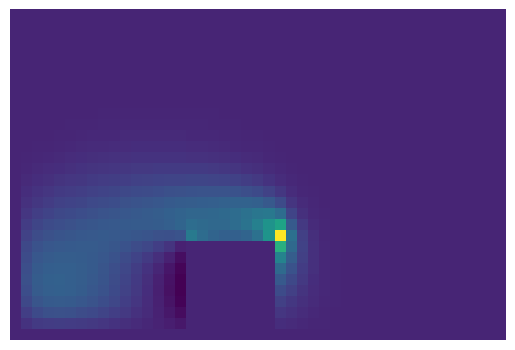

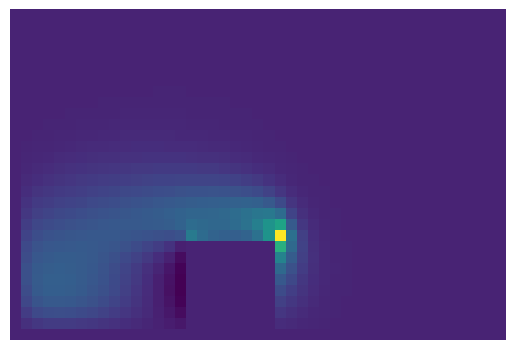

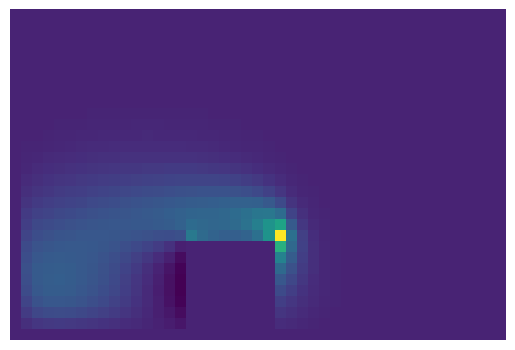

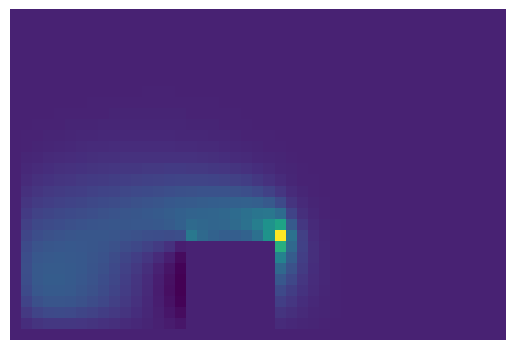

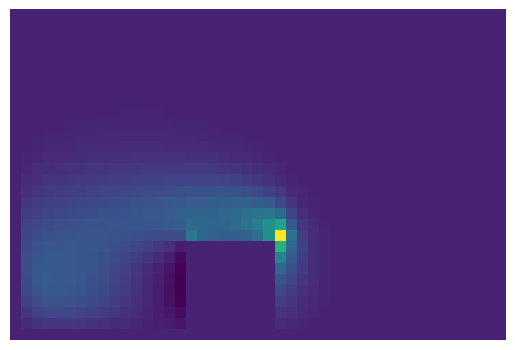

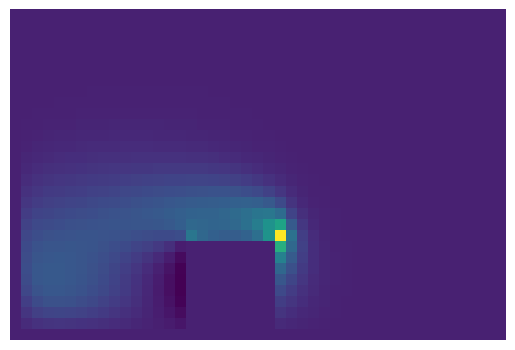

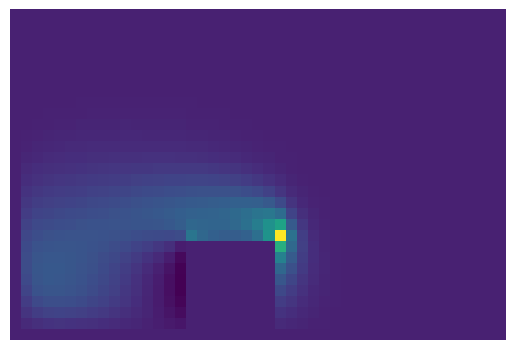

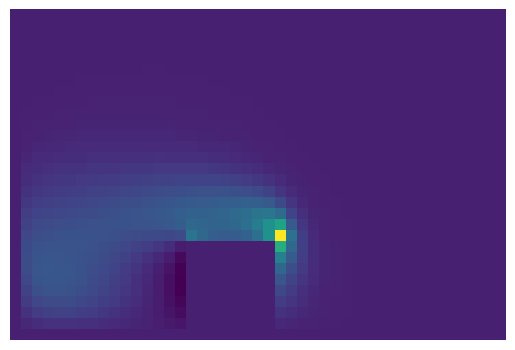

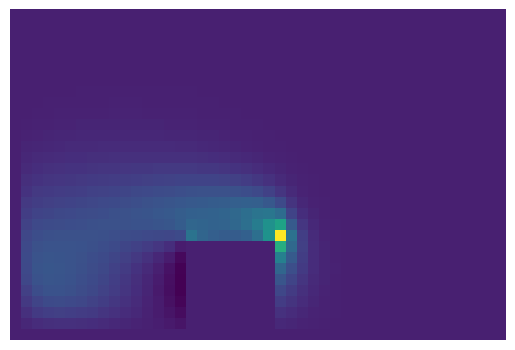

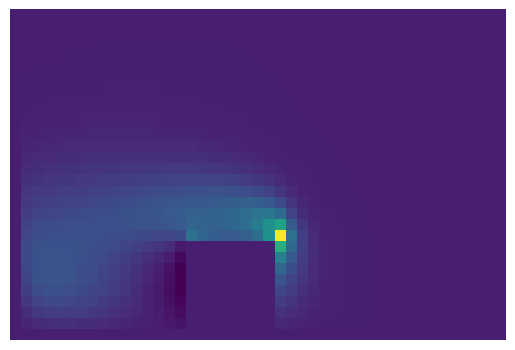

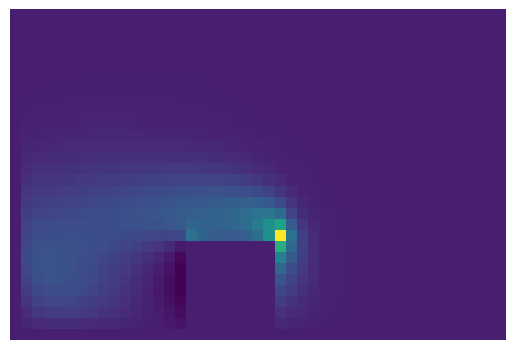

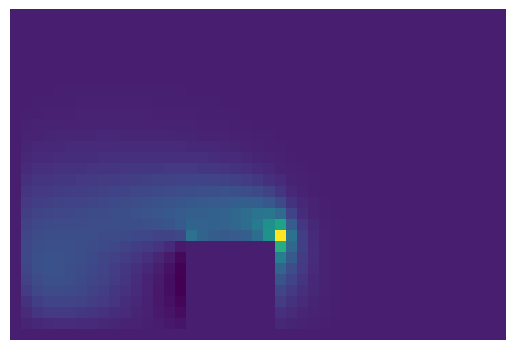

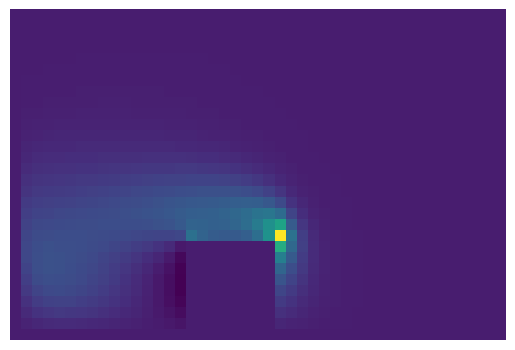

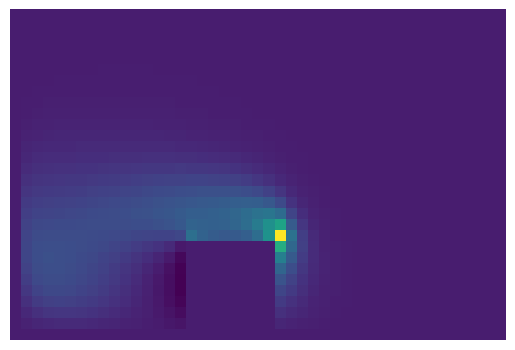

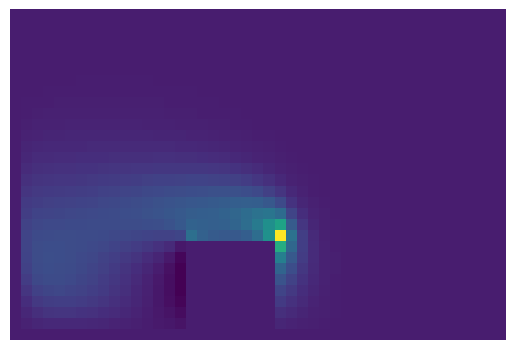

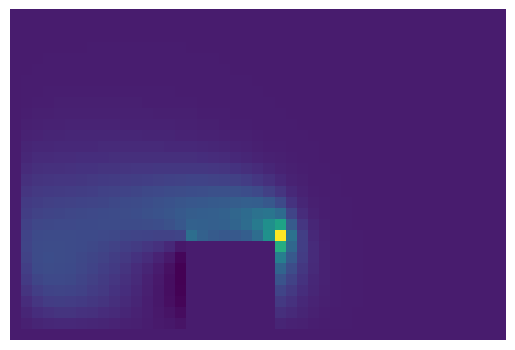

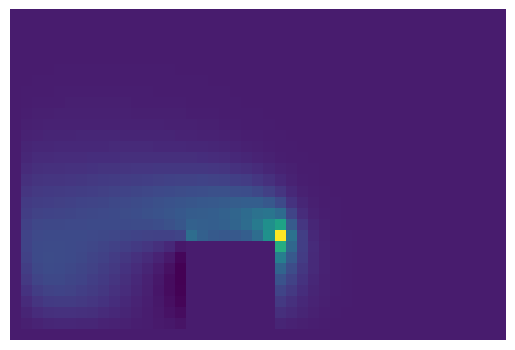

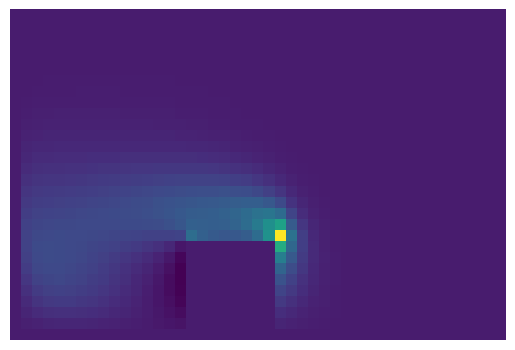

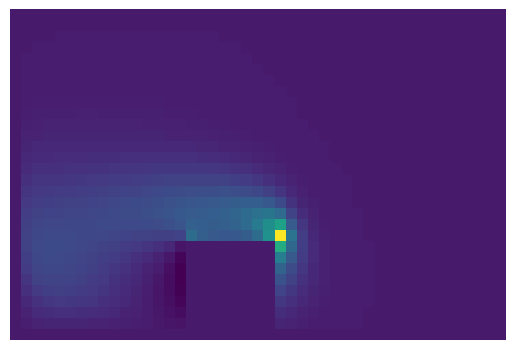

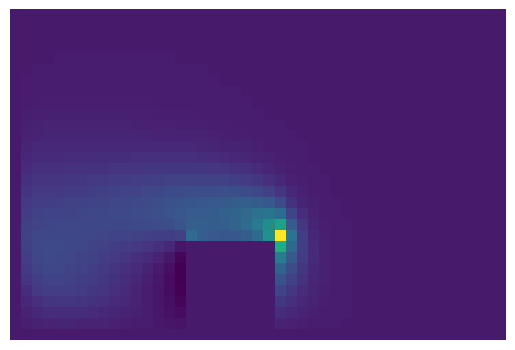

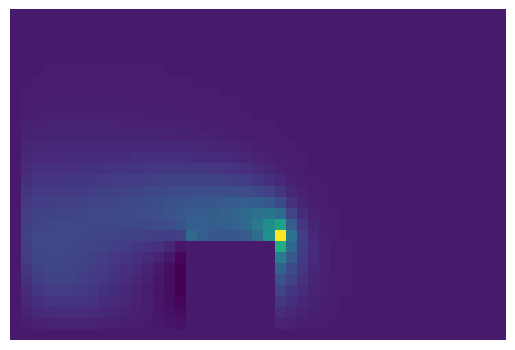

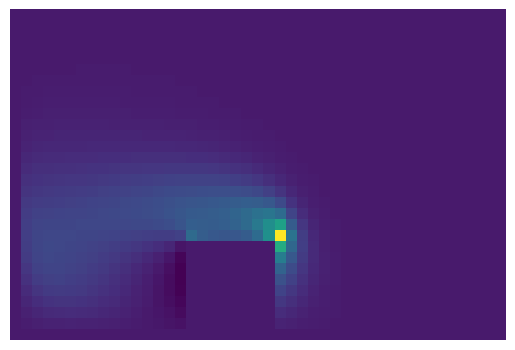

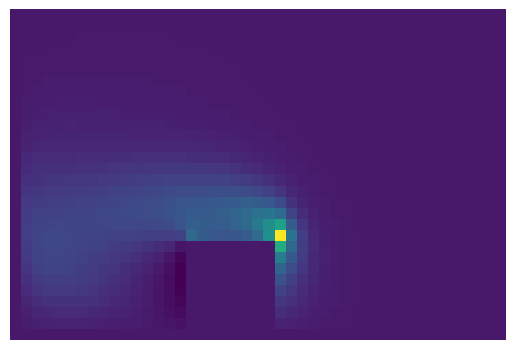

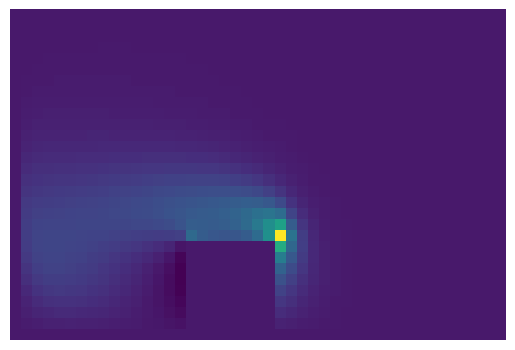

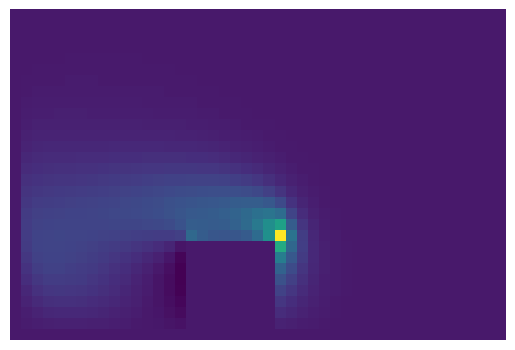

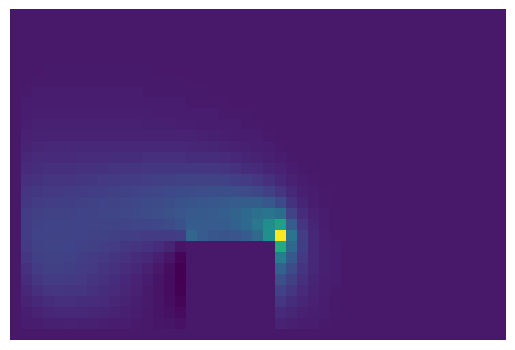

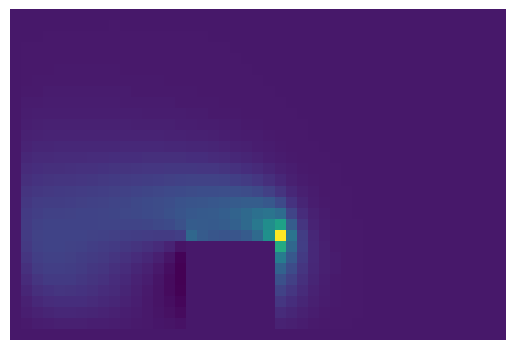

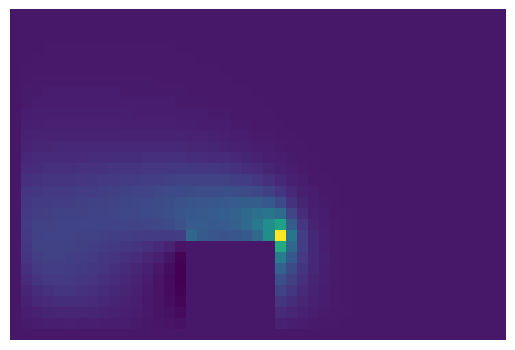

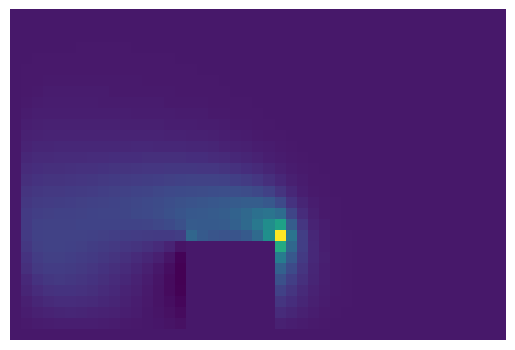

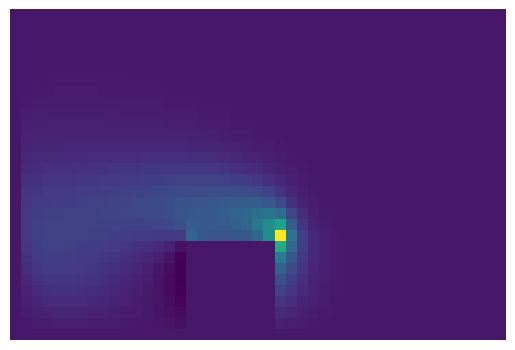

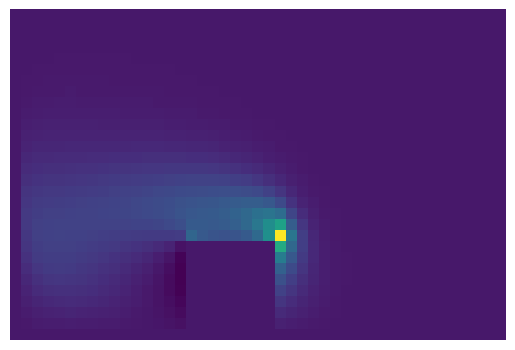

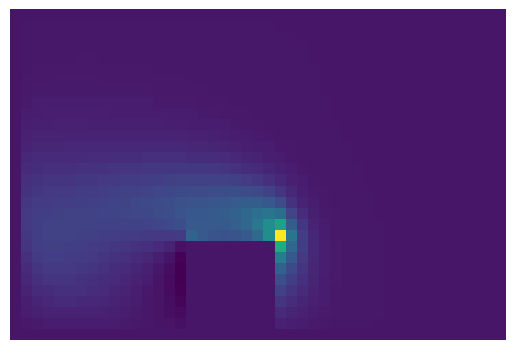

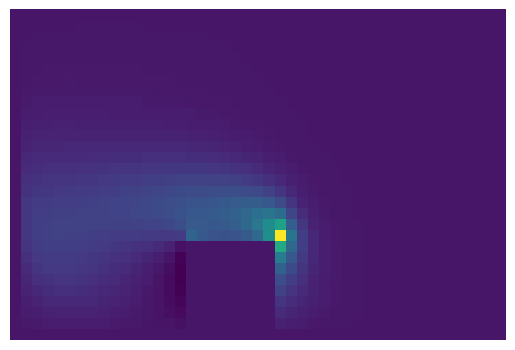

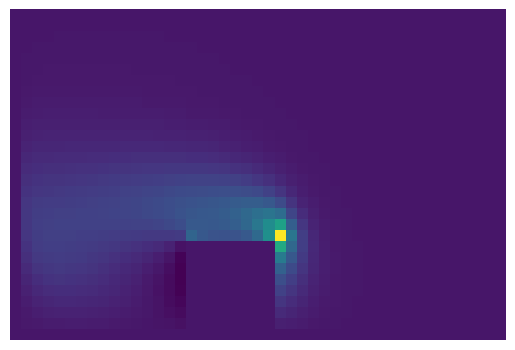

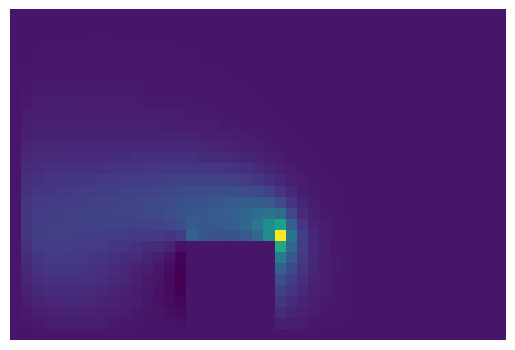

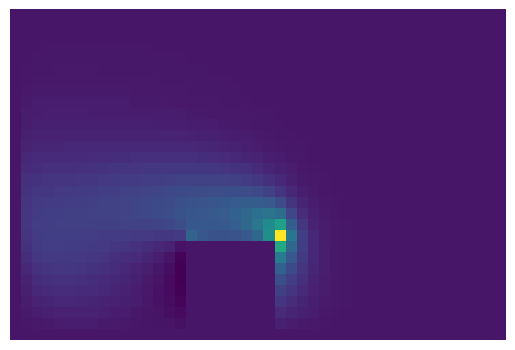

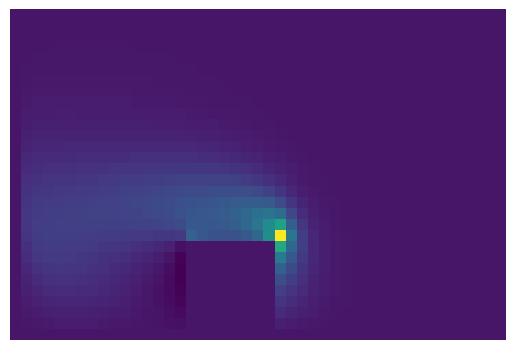

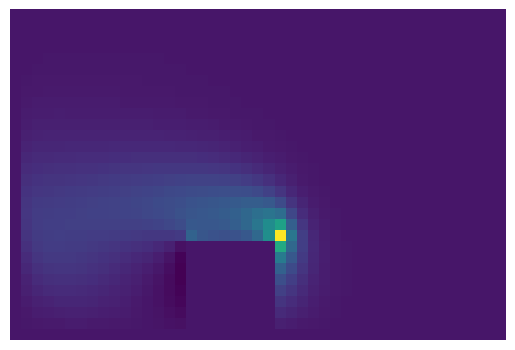

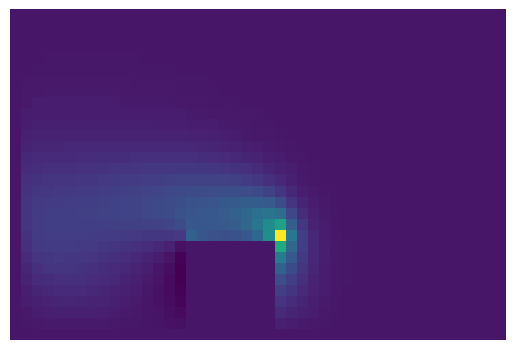

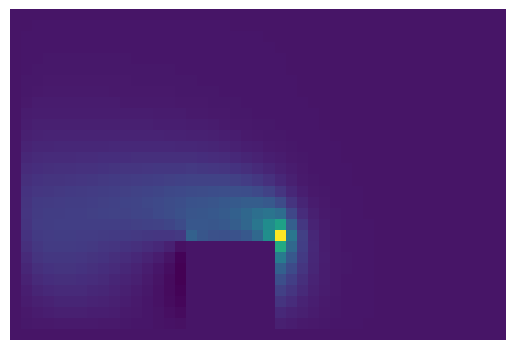

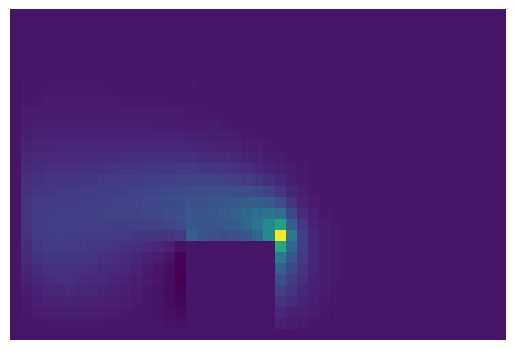

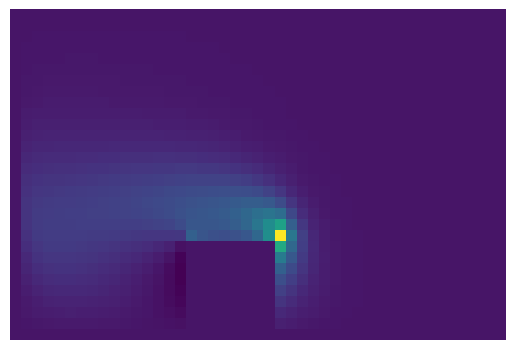

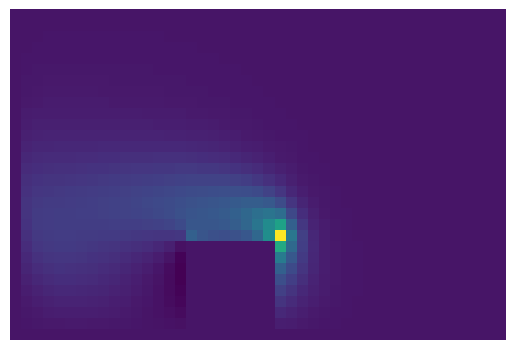

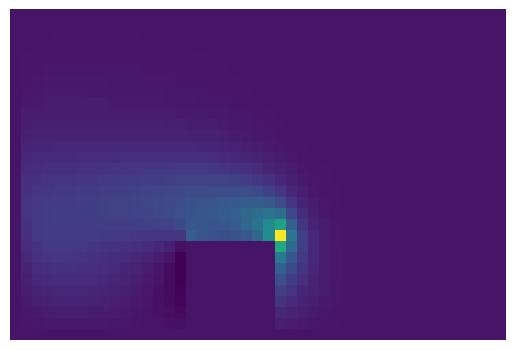

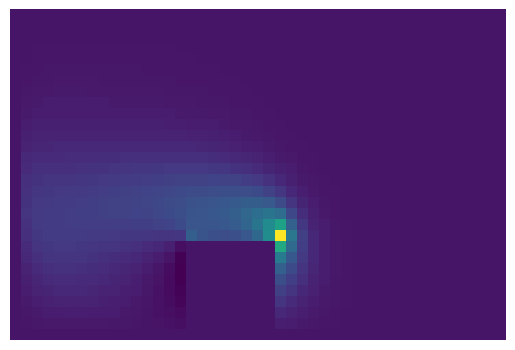

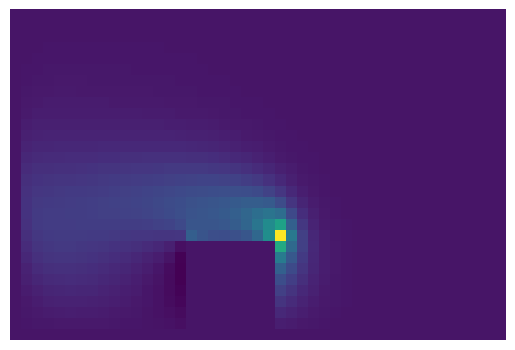

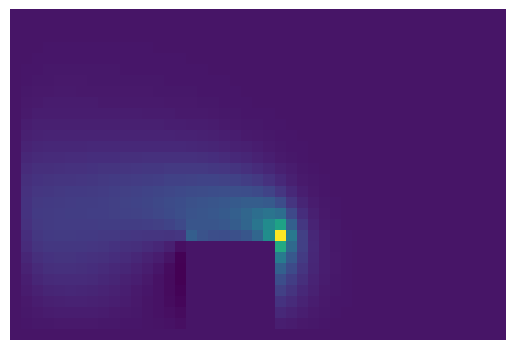

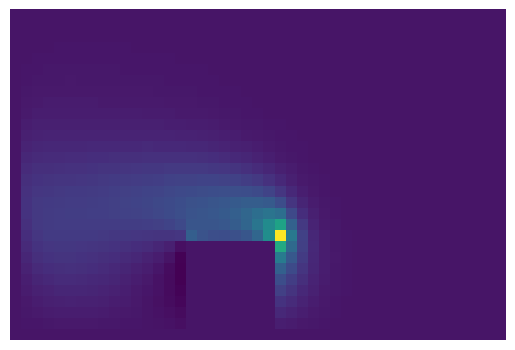

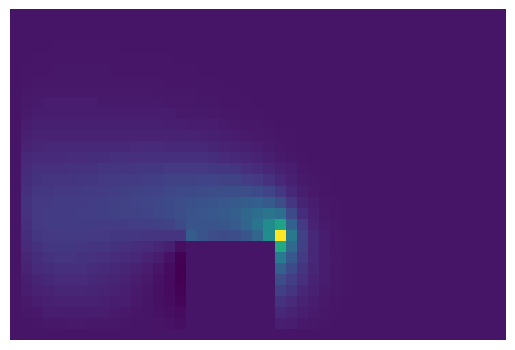

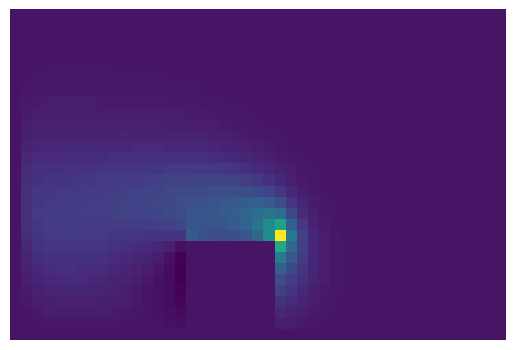

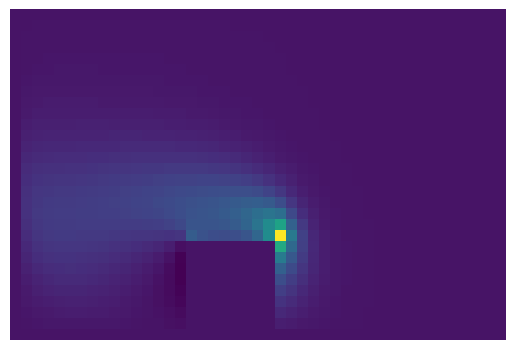

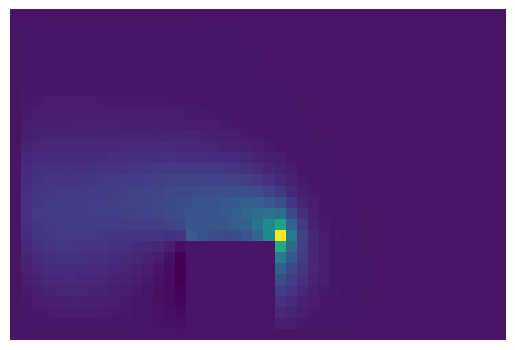

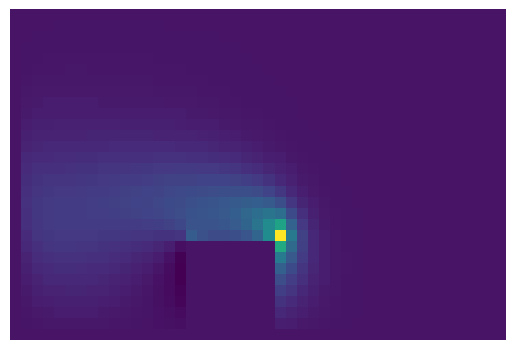

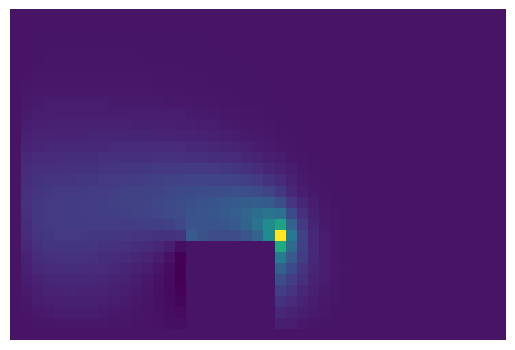

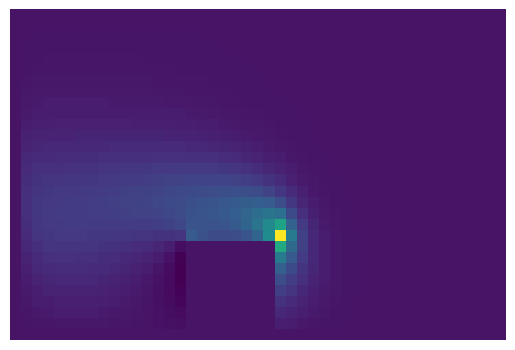

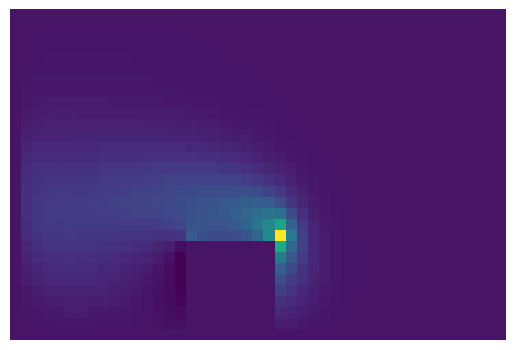

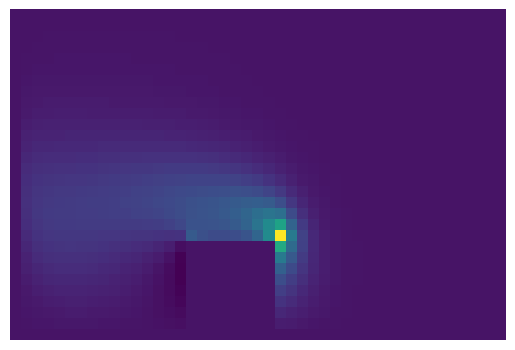

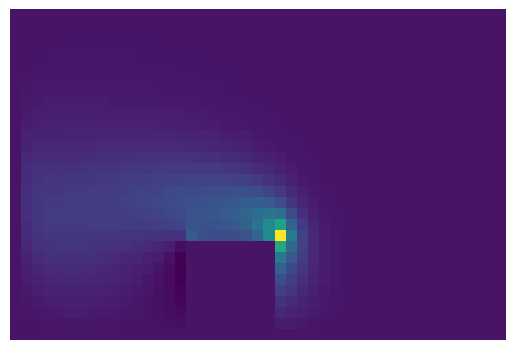

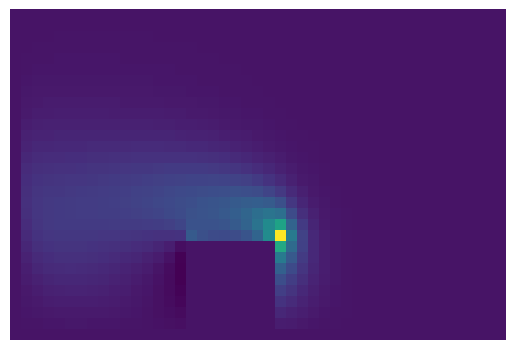

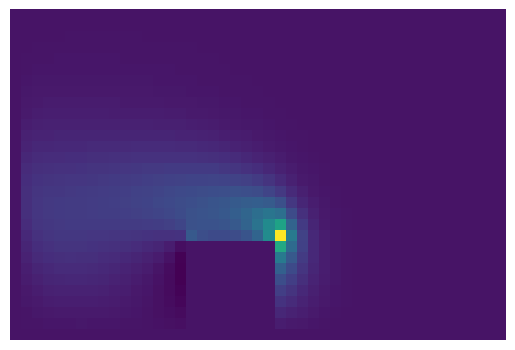

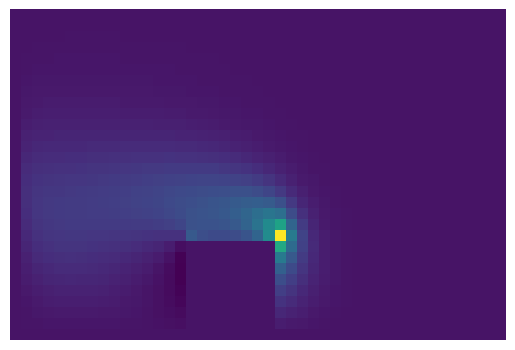

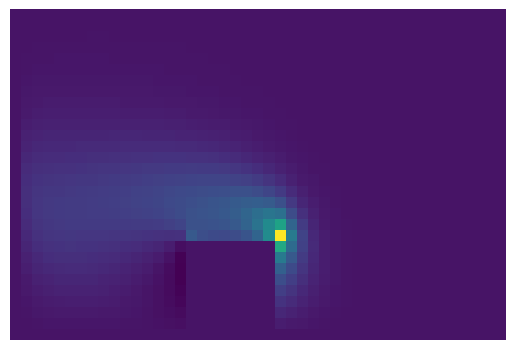

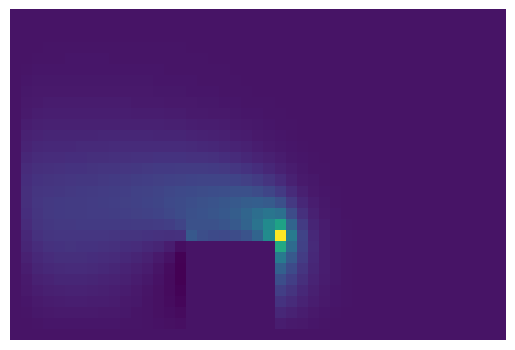

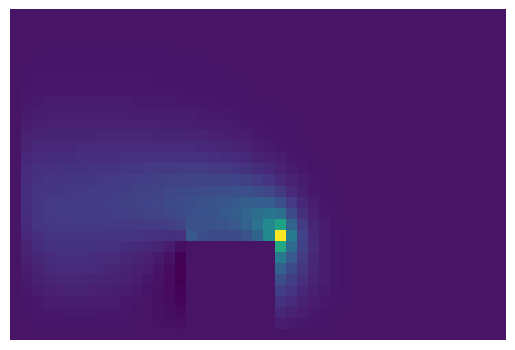

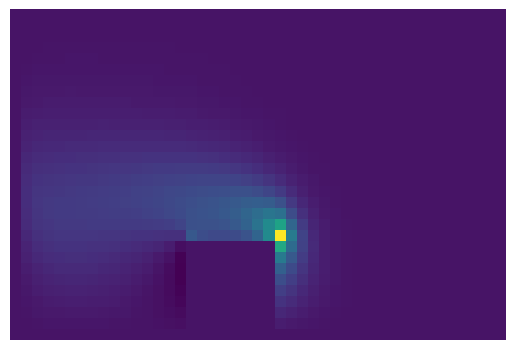

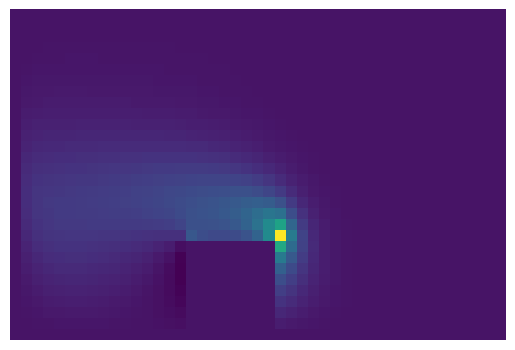

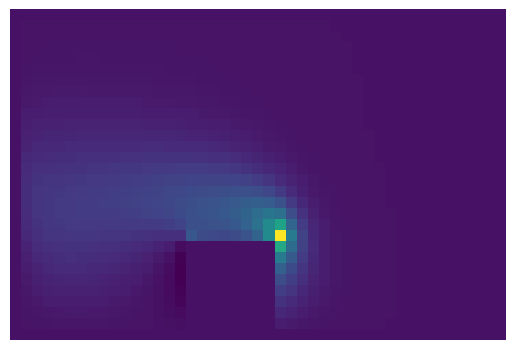

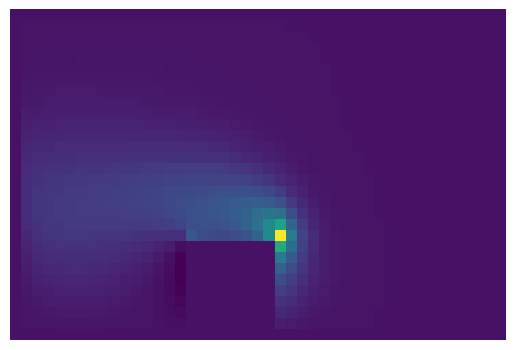

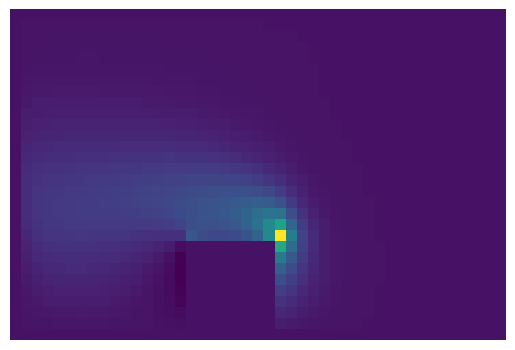

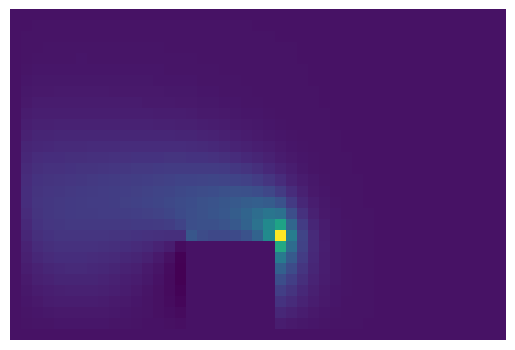

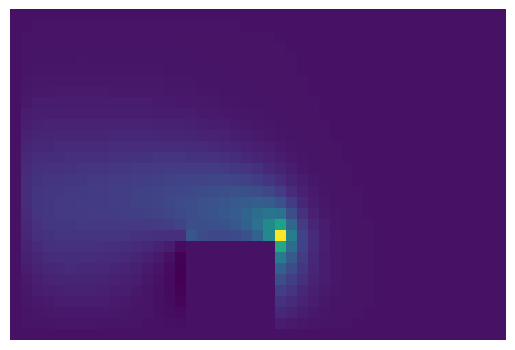

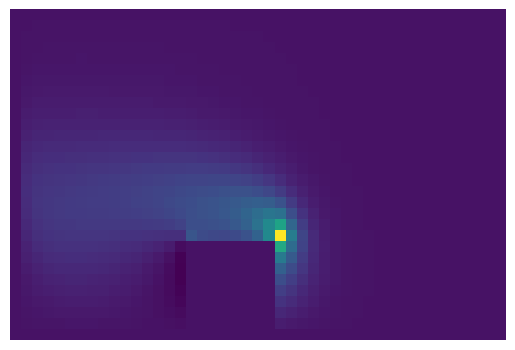

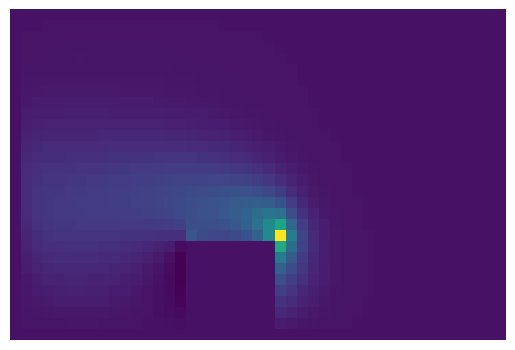

In [263]:
for ii in range(100):
    stream_relax(stream_array, vorticity_array, nx, ny, w_relax, width_obstacle, left_end, right_end)
    vorticity_relax(stream_array, vorticity_array, nx, ny, w_relax, width_obstacle, left_end, right_end, reynolds_number)
    plt.imshow(vorticity_array)
    plt.axis('off')
    plt.savefig(f'animation/myplot{ii}.png')
    plt.show()